In [1]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install sympy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [18, 7] 

In [3]:
from PIL import Image
from numpy import asarray

# load the image
img_1 = Image.open('IMG1.png')
img_2 = Image.open('IMG2.png')


In [4]:
import math
import numpy as np

In [5]:
def bilin(xs,ys):
        #This function takes fraction co-ordinate for source image based on target to source matrix and then uses bilinear interpolation to calculated the value of the given target co-ordinate
        xs_f=math.floor(xs)
        ys_f=math.floor(ys)
        a=ys-ys_f
        b=xs-xs_f
        #Above we calculate all necessary values to perform bilinear interpolation
        if (xs<0 or ys<0 or xs>data.shape[0]-1 or ys>data.shape[1]-1):
            #to account for the fact that this function may sometimes receive invalid co-ordinate such as negative or beyond image dimensions
            return False
        return (((1-a)*(1-b)*data[xs_f][ys_f])+
                ((a)*(1-b)*data[xs_f+1][ys_f])+
                ((1-a)*(b)*data[xs_f][ys_f+1])+
                ((a)*(b)*data[xs_f+1][ys_f+1]))

In [18]:
data = asarray(img_1)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(296, 512)


In [19]:
data = asarray(img_2)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(517, 598)


In [68]:
IMG_1_points=[(29,124),(157,372)]
IMG_2_points=[(93,248),(328,399)]
a=np.empty((0,5))
for i in range(len(IMG_1_points)):
    a = np.append(a, np.array([[1,0,IMG_1_points[i][0],IMG_1_points[i][1],-IMG_2_points[i][0]]]), axis=0)
    a = np.append(a, np.array([[0,1,IMG_1_points[i][1],-IMG_1_points[i][0],-IMG_2_points[i][1]]]), axis=0)

In [69]:
from sympy import * 
A=Matrix(a)
temp=A.nullspace()
a=temp[0][0]
b=temp[0][1]
c=temp[0][2]
d=temp[0][3]

h = np.array([[c,d,a ], 
              [-d,c,b],
              [0,0,1]])
H=Matrix(h)

In [70]:
H

Matrix([
[ 0.866988496302383, 0.500102711585867,  5.8445973705834],
[-0.500102711585867, 0.866988496302383, 154.996405094495],
[                 0,                 0,                1]])

<class 'numpy.ndarray'>
(296, 512)
<class 'numpy.ndarray'>
(517, 598)


Text(0.5, 1.0, 'converted')

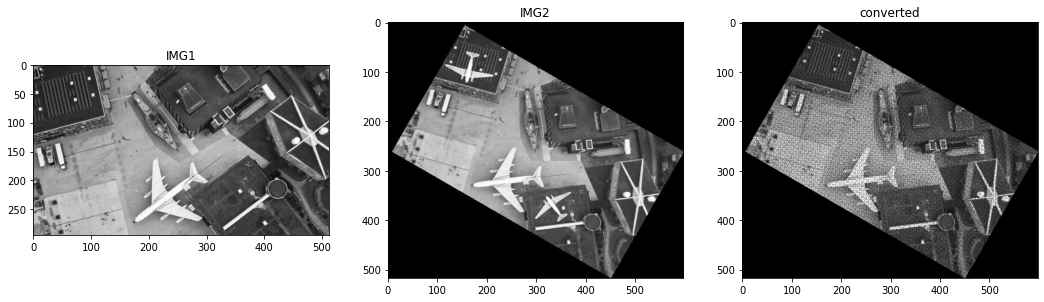

In [57]:
data = asarray(img_1)
data2 = asarray(img_2)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
#again we open the image but this time we iterate through the target co-ordinates


data3=np.zeros((517, 598))
for xs in range(data.shape[0]):
    for ys in range(data.shape[1]):
        x_t=np.matmul(H,np.array([[xs],[ys],[1]]))
        if not ((math.floor(x_t[0])>data3.shape[0]-1) or (math.floor(x_t[1])>data3.shape[1]-1)):
            data3[math.floor(x_t[0])][math.floor(x_t[1])]=data[xs][ys]
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('converted')
#setting up a 1*2 plot to show original, floor image,ceil image.

In [58]:
np.matmul(H,np.array([[xs],[ys],[1]]))

array([[517.158689400164],
       [450.497226787182],
       [1]], dtype=object)

In [63]:
H=np.float_(H)

In [64]:
np.linalg.inv(H)

array([[   0.8654551 ,   -0.49921821,   72.31879117],
       [   0.49921821,    0.8654551 , -137.06015943],
       [   0.        ,    0.        ,    1.        ]])

<class 'numpy.ndarray'>
(296, 512)
<class 'numpy.ndarray'>
(517, 598)


Text(0.5, 1.0, 'converted')

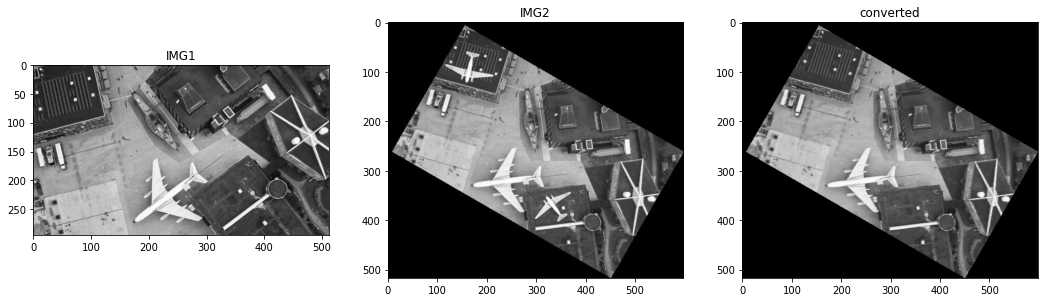

In [65]:
data = asarray(img_1)
data2 = asarray(img_2)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
#again we open the image but this time we iterate through the target co-ordinates
c=0.866698
s=0.5001
a=5.84459
b=154.996405

H = np.array([[c,s,a ], 
              [-s,c,b],
              [0,0,1]])

H_i=np.linalg.inv(H)

data3=np.zeros((517, 598))
for xt in range(data3.shape[0]):
    for yt in range(data3.shape[1]):
        x_s=np.matmul(H_i,np.array([[xt],[yt],[1]]))
        temp=bilin(x_s[0],x_s[1])
        if (temp):
            data3[xt][yt]=temp

        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('IMG1 interpolated')
#setting up a 1*2 plot to show original, floor image,ceil image.

Text(0.5, 1.0, 'Change Detected')

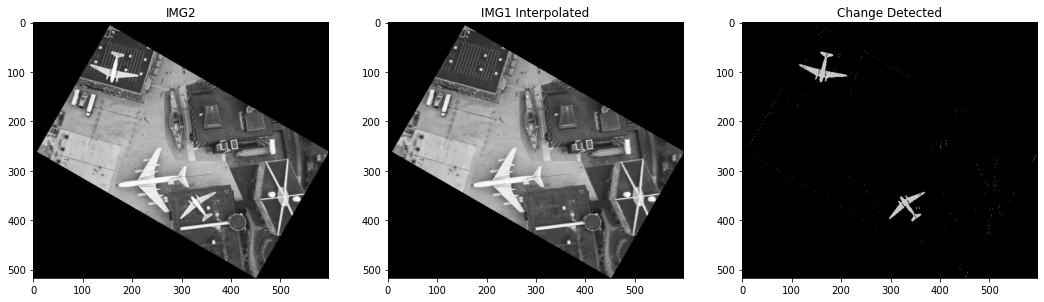

In [66]:
data4=np.zeros((517, 598))
threshold=100
for i in range(data4.shape[0]):
    for j in range(data4.shape[1]):
        if (threshold<data2[i][j]-data3[i][j]) or (-threshold>data2[i][j]-data3[i][j]):
            data4[i][j]=200
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
image4 = Image.fromarray(data4)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image2,cmap="gray")
axis[0].set_title('IMG2')
axis[1].imshow(image3,cmap="gray")
axis[1].set_title('IMG1 Interpolated')
axis[2].imshow(image4,cmap="gray")
axis[2].set_title('Change Detected')
#setting up a 1*3 plot to show original, floor image,ceil image.

In [71]:
IMG_2_points=[(29,124),(157,372)]
IMG_1_points=[(93,248),(328,399)]
a=np.empty((0,5))
for i in range(len(IMG_1_points)):
    a = np.append(a, np.array([[1,0,IMG_1_points[i][0],IMG_1_points[i][1],-IMG_2_points[i][0]]]), axis=0)
    a = np.append(a, np.array([[0,1,IMG_1_points[i][1],-IMG_1_points[i][0],-IMG_2_points[i][1]]]), axis=0)

In [72]:
from sympy import * 
A=Matrix(a)
temp=A.nullspace()
a=temp[0][0]
b=temp[0][1]
c=temp[0][2]
d=temp[0][3]

h = np.array([[c,d,a ], 
              [-d,c,b],
              [0,0,1]])
H=Matrix(h)

In [73]:
H

Matrix([
[0.865455104708687, -0.499218209314844,  72.3187911721734],
[0.499218209314844,  0.865455104708687, -137.060159434035],
[                0,                  0,                 1]])

<class 'numpy.ndarray'>
(517, 598)
<class 'numpy.ndarray'>
(296, 512)


Text(0.5, 1.0, 'converted')

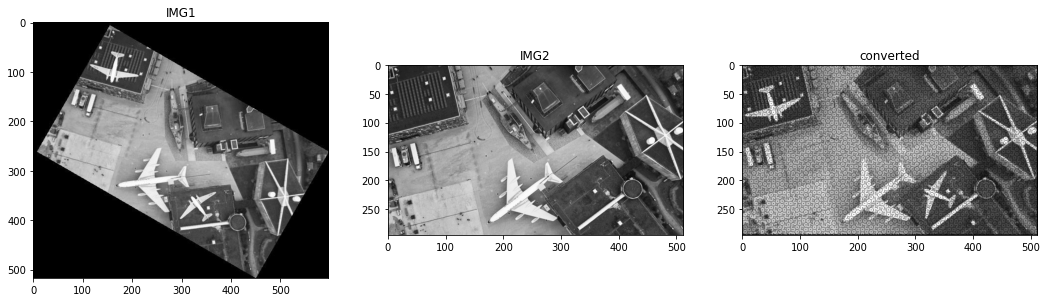

In [76]:
data = asarray(img_2)
data2 = asarray(img_1)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
#again we open the image but this time we iterate through the target co-ordinates


data3=np.zeros((296,512))
for xs in range(data.shape[0]):
    for ys in range(data.shape[1]):
        x_t=np.matmul(H,np.array([[xs],[ys],[1]]))
        if not ((math.floor(x_t[0])>data3.shape[0]-1) or (math.floor(x_t[1])>data3.shape[1]-1)):
            data3[math.floor(x_t[0])][math.floor(x_t[1])]=data[xs][ys]
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('converted')
#setting up a 1*2 plot to show original, floor image,ceil image.

In [75]:
data3.shape

(517, 598)

<class 'numpy.ndarray'>
(517, 598)
<class 'numpy.ndarray'>
(296, 512)


Text(0.5, 1.0, 'IMG1 interpolated')

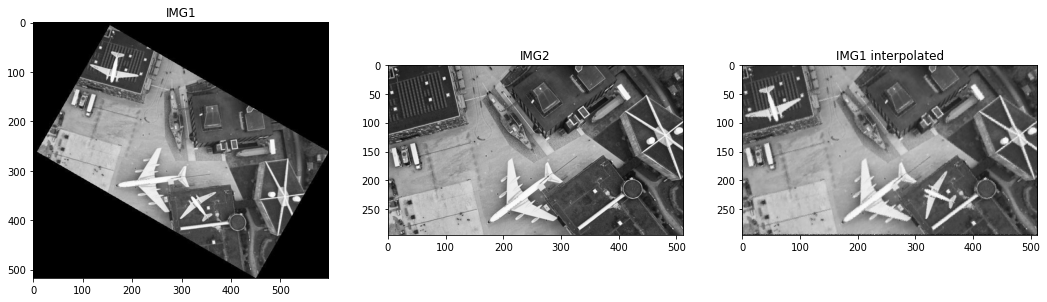

In [78]:
data = asarray(img_2)
data2 = asarray(img_1)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
H=np.float_(H)
H_i=np.linalg.inv(H)

data3=np.zeros((296,512))
for xt in range(data3.shape[0]):
    for yt in range(data3.shape[1]):
        x_s=np.matmul(H_i,np.array([[xt],[yt],[1]]))
        temp=bilin(x_s[0],x_s[1])
        if (temp):
            data3[xt][yt]=temp

        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('IMG1 interpolated')
#setting up a 1*2 plot to show original, floor image,ceil image.

Text(0.5, 1.0, 'Change Detected')

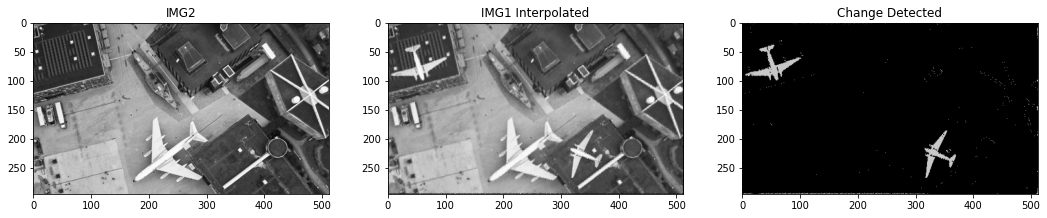

In [79]:
data4=np.zeros((296,512))
threshold=100
for i in range(data4.shape[0]):
    for j in range(data4.shape[1]):
        if (threshold<data2[i][j]-data3[i][j]) or (-threshold>data2[i][j]-data3[i][j]):
            data4[i][j]=200
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
image4 = Image.fromarray(data4)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image2,cmap="gray")
axis[0].set_title('IMG2')
axis[1].imshow(image3,cmap="gray")
axis[1].set_title('IMG1 Interpolated')
axis[2].imshow(image4,cmap="gray")
axis[2].set_title('Change Detected')
#setting up a 1*3 plot to show original, floor image,ceil image.